<a href="https://colab.research.google.com/github/sanjayssane/ML2/blob/master/Lung_Cancer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
os.chdir("/content/drive/MyDrive/Lung-Colon-Cancer/lung_image_sets")

In [ ]:
TRAIN_ACA_DIR = "./Splitted/TRAIN/aca/"
TEST_ACA_DIR = "./Splitted/TEST/aca/"
VAL_ACA_DIR = "./Splitted/VAL/aca/"

TRAIN_N_DIR = "./Splitted/TRAIN/n/"
TEST_N_DIR = "./Splitted/TEST/n/"
VAL_N_DIR = "./Splitted/VAL/n/"

TRAIN_SCC_DIR = "./Splitted/TRAIN/scc/"
TEST_SCC_DIR = "./Splitted/TEST/scc/"
VAL_SCC_DIR = "./Splitted/VAL/scc/"

In [ ]:
print("In Training Dataset...")
print("Number of training ACA images: ", len(os.listdir(TRAIN_ACA_DIR)))
print("Number of training N images: ", len(os.listdir(TRAIN_N_DIR)))
print("Number of training SCC images: ", len(os.listdir(TRAIN_SCC_DIR)))

In Training Dataset...
Number of training ACA images:  4506
Number of training N images:  4500
Number of training SCC images:  4500


In [ ]:
print("In Validation Dataset...")
print("Number of validation ACA images: ", len(os.listdir(VAL_ACA_DIR)))
print("Number of validation N images: ", len(os.listdir(VAL_N_DIR)))
print("Number of validation SCC images: ", len(os.listdir(VAL_SCC_DIR)))

In Validation Dataset...
Number of validation ACA images:  350
Number of validation N images:  360
Number of validation SCC images:  350


In [ ]:
print("In Testing Dataset...")
print("Number of testing ACA images: ", len(os.listdir(TEST_ACA_DIR)))
print("Number of testing N images: ", len(os.listdir(TEST_N_DIR)))
print("Number of testing SCC images: ", len(os.listdir(TEST_SCC_DIR)))

In Testing Dataset...
Number of testing ACA images:  150
Number of testing N images:  150
Number of testing SCC images:  150


Image Generator

In [ ]:
TRAINING_DIR = "./Splitted/TRAIN"
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./Splitted/VAL"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 13506 images belonging to 3 classes.
Found 1060 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1, seed=2019),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2, seed=2019),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=15, verbose=2, mode='auto',
        restore_best_weights=True)
history = model.fit(train_generator,
                     validation_data=validation_generator,callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
423/423 - 3881s - loss: 0.4091 - acc: 0.8230 - val_loss: 0.2865 - val_acc: 0.8792
Epoch 2/500
423/423 - 216s - loss: 0.2767 - acc: 0.8878 - val_loss: 0.1749 - val_acc: 0.9340
Epoch 3/500
423/423 - 215s - loss: 0.2468 - acc: 0.8983 - val_loss: 0.2157 - val_acc: 0.8915
Epoch 4/500
423/423 - 215s - loss: 0.2005 - acc: 0.9206 - val_loss: 0.1464 - val_acc: 0.9377
Epoch 5/500
423/423 - 212s - loss: 0.1818 - acc: 0.9279 - val_loss: 0.1627 - val_acc: 0.9377
Epoch 6/500
423/423 - 212s - loss: 0.1798 - acc: 0.9268 - val_loss: 0.1149 - val_acc: 0.9481
Epoch 7/500
423/423 - 213s - loss: 0.1599 - acc: 0.9365 - val_loss: 0.1090 - val_acc: 0.9613
Epoch 8/500
423/423 - 210s - loss: 0.1545 - acc: 0.9394 - val_loss: 0.1078 - val_acc: 0.9575
Epoch 9/500
423/423 - 208s - loss: 0.1377 - acc: 0.9443 - val_loss: 0.1173 - val_acc: 0.9462
Epoch 10/500
423/423 - 207s - loss: 0.1341 - acc: 0.9468 - val_loss: 0.0820 - val_acc: 0.9632
Epoch 11/500
423/423 - 207s - loss: 0.1295 - acc: 0.9484 - val_loss:

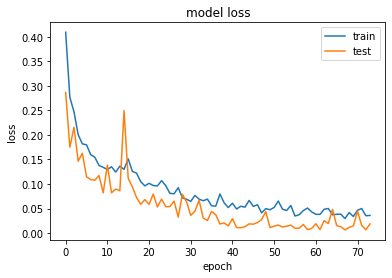

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
tf.keras.models.save_model(model=model, filepath="/content/drive/MyDrive/Built Models/Lung_Cancer_01May")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Built Models/Lung_Cancer_01May/assets


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving lungn243.jpeg to lungn243.jpeg
lungn243.jpeg
[[0. 1. 0.]]
